In [20]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json 
from pandas.io.json import json_normalize
import seaborn as sns

from urllib.request import urlopen
import requests
import cv2
from time import time
from scipy import stats


In [5]:
dframe = pd.read_json ("https://raw.githubusercontent.com/TiernonRR/Dank_AIT/master/image_analysis/dank_cleaned2.json?token=APDMU6TB5AJUDUEZKHCVIDS6Y32X4")
dframe.head()

,author,awards,created_utc,text_from_image,words,processed_words,downs,id,is_nsfw,media,...,ups,url,avg_hue,avg_saturation,avg_value,avg_redRGB,avg_greenRGB,avg_blueRGB,avg_tan,avg_orange
1,L71U,[],1584295514,NICE DICK\r\n,Ricardo😎NICE DICK\r\n,"[ricardo, nice, dick]",0,fj5ixk,False,https://i.redd.it/w6acm47gmvm41.jpg,...,35,/r/dank_meme/comments/fj5ixk/ricardo/,30.615726,54.625239,115.329441,114.286112,95.549915,93.377158,2.784004,0.331221
2,Awesome-ness5,[],1584294841,Nvidia's calling on gaming PC owners to\r\nput...,Gamers AssembleNvidia's calling on gaming PC o...,"[gamer, assemblenvidia, call, game, owner, sys...",0,fj5bzj,False,https://i.redd.it/bqawbb5gkvm41.jpg,...,11,/r/dank_meme/comments/fj5bzj/gamers_assemble/,24.111360,54.654363,57.319827,56.875315,37.439437,31.829427,3.555040,6.742880
7,notaspop,[],1584293653,When you post a low-effort meme\r\nfor fun to ...,I mean.... Not Corona time?When you post a low...,"[mean, corona, time, post, effort, meme, peopl...",0,fj50df,False,https://i.redd.it/v5pea6wwgvm41.jpg,...,1,/r/dank_meme/comments/fj50df/i_mean_not_corona...,24.042466,31.159050,171.316157,166.302295,170.280321,163.097218,0.136924,0.000000
8,Gaunja420,[],1584293617,H A p pyt1A\r\n,WheNH A p pyt1A\r\n,[whenh],0,fj501g,False,https://i.redd.it/809pja1tgvm41.gif,...,1,/r/dank_meme/comments/fj501g/when/,44.428757,66.669514,199.776800,171.892931,188.582538,179.439702,0.023580,0.000243
9,In_An_Elmo_Cult,[],1584293448,All of the internet:\r\nHe •I've seen this one...,.All of the internet:\r\nHe •I've seen this on...,"[internet, see, internet, explor, whatdo, mean...",0,fj4ycc,False,https://i.redd.it/hakptfr2gvm41.png,...,1,/r/dank_meme/comments/fj4ycc/_/,15.506512,27.647186,238.673314,231.710056,225.154488,221.692281,6.094527,12.068732


Text(0, 0.5, 'thumbnail height (pixels)')

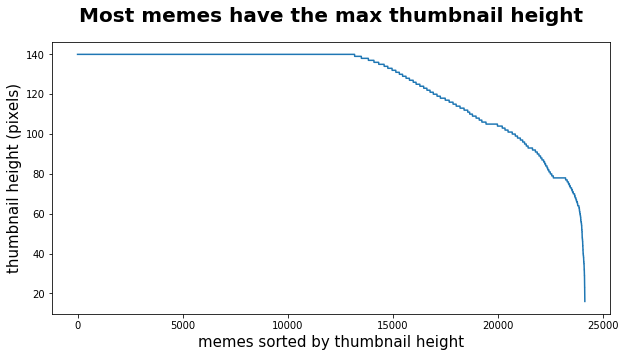

In [37]:
# view distribution of thumbnail height in data
height_sorted = list(dframe['thumbnail.height'])
height_sorted = sorted(height_sorted, reverse=True)
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(np.linspace(1,len(dframe['thumbnail.height']),len(dframe['thumbnail.height'])),height_sorted)
plt.title("Most memes have the max thumbnail height",fontsize=20,pad=20,fontweight='bold')
plt.xlabel("memes sorted by thumbnail height",fontsize=15)
plt.ylabel("thumbnail height (pixels)",fontsize=15)

slope of the trendline is 6.068507 with r value of 0.034300


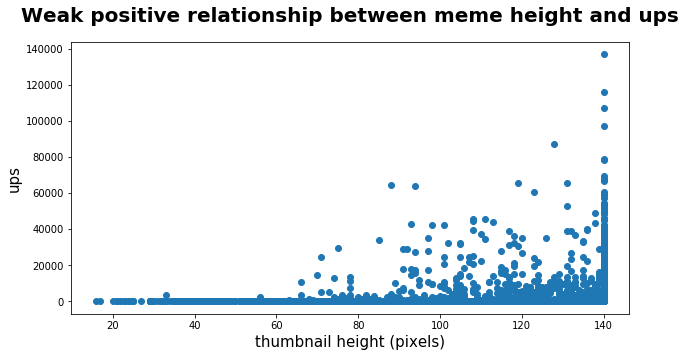

In [39]:
# view relationship between thumbnail height and ups
height = list(dframe['thumbnail.height'])
ups = list(dframe['ups'])
# remove one extreme ups outlier for better visualization
for val in ups:
    if (val > 150000):
        height.pop(ups.index(val))
        ups.remove(val)    

# fit a trendline
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(height,ups)
z = np.polyfit(height,ups, 1); p = np.poly1d(z)
slope, intercept, r_value, p_value, std_err = stats.linregress(height,ups)
#plt.plot(height,height,"r--")
plt.title("Weak positive relationship between meme height and ups",fontsize=20,pad=20,fontweight='bold')
plt.xlabel("thumbnail height (pixels)",fontsize=15); plt.ylabel("ups",fontsize=15)
print('slope of the trendline is %f' %slope, 'with r value of %f' %r_value)
plt.show()

slope of the trendline is -0.652370 with r value of -0.005200


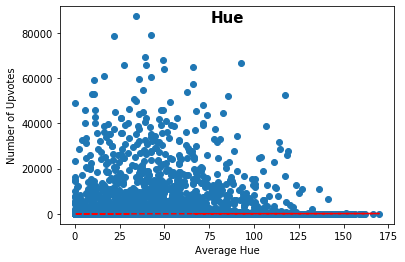

In [28]:
# function to plot the b
def plotWithUps(data,name):
    hue = list(data)
    ups = list(dframe['ups'])
    # remove extreme ups outliers
    for val in ups:
        if (val > 90000):
            hue.pop(ups.index(val))
            ups.remove(val)       
    plt.scatter(hue,ups)

    # fit a trendline
    z = np.polyfit(hue,ups, 1); p = np.poly1d(z)
    slope, intercept, r_value, p_value, std_err = stats.linregress(hue,ups)
    plt.plot(hue,hue,"r--")
    plt.title(name,position=(0.5, 0.9),fontweight="bold",fontsize=15)
    plt.xlabel('Average %s' %name); plt.ylabel('Number of Upvotes')
    print('slope of the trendline is %f' %slope, 'with r value of %f' %r_value)
    plt.show()
    
plotWithUps(dframe['avg_hue'],'Hue')

slope of the trendline is -0.402530 with r value of -0.004510


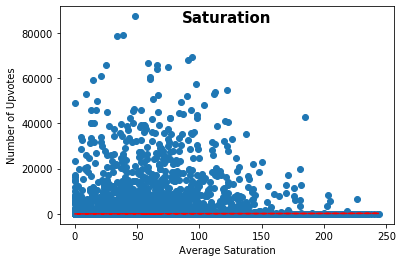

In [50]:
plotWithUps(dframe['avg_saturation'],'Saturation')

slope of the trendline is -0.150115 with r value of -0.002099


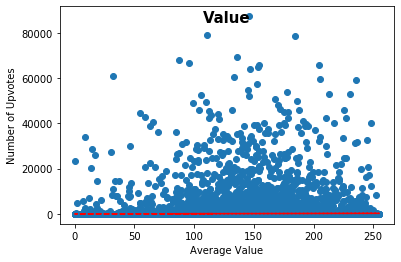

In [51]:
plotWithUps(dframe['avg_value'],'Value')

slope of the trendline is 0.021053 with r value of 0.000302


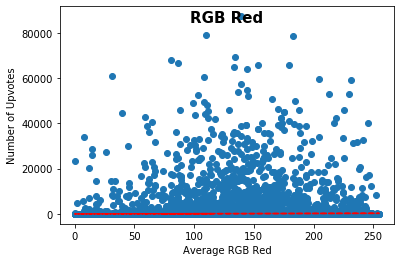

In [52]:
plotWithUps(dframe['avg_redRGB'],'RGB Red')

slope of the trendline is -0.082743 with r value of -0.001172


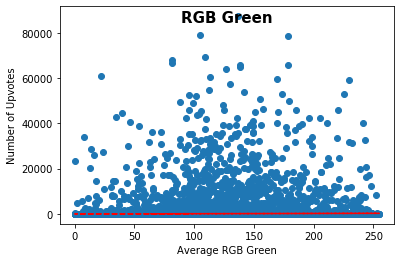

In [53]:
plotWithUps(dframe['avg_greenRGB'],'RGB Green')

slope of the trendline is 0.065345 with r value of 0.000936


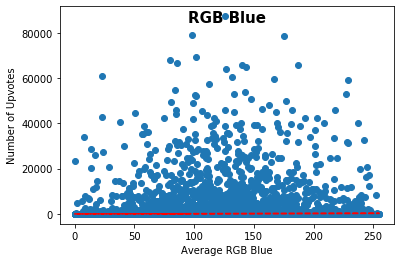

In [54]:
plotWithUps(dframe['avg_blueRGB'],'RGB Blue')